In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('/content/drive/MyDrive/UFC/2021.1/ML/dataset/diabetes.csv')

In [5]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

Crie e avalie modelos usando kNN, Logistic Regression, SVM e Naive Bayes. Aplique um Grid Search com Validação Cruzada (CV) com k=5 no k-Fold sobre o conjunto de treino. A métrica de avaliação usada deve ser a métrica F1-Score. Teste diferentes hiperparâmetros. Escolha o melhor algoritmo e hiperparâmetros baseado no Grid Search. 

In [6]:
model_knn = KNeighborsClassifier()
model_lr =  LogisticRegression(max_iter=10000)
model_svm = svm.SVC()
model_nb = GaussianNB()

In [7]:
pipe_knn = pipeline.make_pipeline(preprocessing.StandardScaler(),
                         model_knn)
pipe_lr = pipeline.make_pipeline(preprocessing.StandardScaler(),
                         model_lr)

pipe_svm = pipeline.make_pipeline(preprocessing.StandardScaler(),
                         svm.SVC(random_state=1))

pipe_nb = pipeline.make_pipeline(preprocessing.StandardScaler(),
                         GaussianNB())

In [19]:
param_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,10,1),
             'kneighborsclassifier__weights':['uniform', 'distance'],
             'kneighborsclassifier__algorithm':['auto','ball_tree','kd_tree','brute']}

param_lr = [{'logisticregression__penalty':['l1'],'logisticregression__C':np.logspace(-5,4,10),
             'logisticregression__solver':['liblinear','saga']},
            {'logisticregression__penalty':['l2'],'logisticregression__C':np.logspace(-5,4,10),
             'logisticregression__solver':['newton-cg','lbfgs','sag','saga']},
            {'logisticregression__penalty':['elasticnet'],'logisticregression__C':np.logspace(-5,4,10),
             'logisticregression__solver':['saga'], 'logisticregression__l1_ratio':[0.5]},
            {'logisticregression__penalty':['none'],
             'logisticregression__solver':['newton-cg','lbfgs','sag','saga']}]
            
param_svm = {'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'gamma':['scale','auto']
             }

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]
param_nb = {'gaussiannb__var_smoothing': np.logspace(-9, 9, 18)}

In [21]:
knn_grid = GridSearchCV(pipe_knn,param_knn,cv=5,scoring='f1_weighted')
knn_grid.fit(X_treino,y_treino);
knn_grid.best_score_
#knn_grid.best_params_

0.7461628510671505

In [22]:
lr_grid = GridSearchCV(pipe_lr,param_lr,cv=5,scoring='f1_weighted')
lr_grid.fit(X_treino,y_treino);
lr_grid.best_score_
#lr_grid.best_params_

0.7593090347099626

In [23]:
svm_grid = GridSearchCV(pipe_svm,param_grid,cv=5,scoring='f1_weighted')
svm_grid.fit(X_treino,y_treino);
svm_grid.best_score_
#svm_grid.best_params_

0.7671296474164075

In [ ]:
param_nb = {'gaussiannb__var_smoothing': np.logspace(-20, -1, 20)}

In [24]:
nb_grid = GridSearchCV(pipe_nb,param_nb,cv=5,scoring='f1_weighted')
nb_grid.fit(X_treino, y_treino);
nb_grid.best_params_
nb_grid.best_score_

0.7481880432488468

In [27]:
scaler = StandardScaler()
X_treino_std = scaler.fit_transform(X_treino)
X_teste_std = scaler.transform(X_teste)
model_svm = svm.SVC(C=100.0, gamma=0.001,kernel='rbf')
model_svm.fit(X_treino_std,y_treino)
y_pred = model_svm.predict(X_teste_std)
metrics.f1_score(y_teste,y_pred)

0.6788990825688074

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


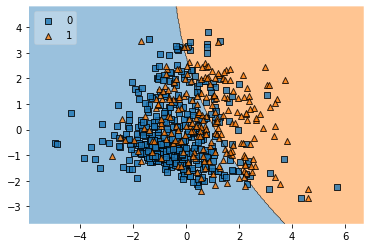

In [28]:
pca = PCA(n_components=2);
#X_2D = pca.fit_transform(X_treino_std);

model_svm = svm.SVC(C=100.0, gamma=0.001,kernel='rbf')
treino_pca = pca.fit_transform(X_treino_std)
model_svm.fit(treino_pca,y_treino)

plot_decision_regions(treino_pca,np.array(y_treino), clf=model_svm, legend=2);
plt.show();
